In [1]:
import os

os.chdir('C:/대학원/2019-1/1.전공/2.데이터마이닝/project/도로/result')
os.getcwd()

'C:\\대학원\\2019-1\\1.전공\\2.데이터마이닝\\project\\도로\\result'

In [2]:
import pandas as pd
import numpy as np

morning_train = pd.read_csv('morning_train.csv',encoding='utf8')
morning_test = pd.read_csv('morning_test.csv',encoding='utf8')

In [3]:
import glob
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score

print(morning_train.columns)

Index(['date', 'days', 'road_name', 'link_id', 'start_point', 'end_point',
       'direction', 'road_length', 'road_num', 'road_type', 'urban_suburb',
       'district', 'special', 'vacation', 'time', 'temperature', 'wind',
       'rain', 'snow', 'cctv', 'kids', 'speed_limit', 'entrance', 'signal',
       'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM2.5', 'inter_num', 'd1', 'd2',
       'd3', 'd4', 'd_sum', 'severity', 'accident_count', 'y'],
      dtype='object')


In [5]:
morning_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007605 entries, 0 to 3007604
Data columns (total 39 columns):
date              int64
days              object
road_name         object
link_id           int64
start_point       object
end_point         object
direction         object
road_length       int64
road_num          float64
road_type         object
urban_suburb      object
district          object
special           int64
vacation          int64
time              int64
temperature       float64
wind              float64
rain              float64
snow              float64
cctv              float64
kids              float64
speed_limit       float64
entrance          float64
signal            float64
SO2               float64
CO                float64
O3                float64
NO2               float64
PM10              float64
PM2.5             float64
inter_num         float64
d1                float64
d2                float64
d3                float64
d4                float

In [22]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
morning_train["days"] = lb_make.fit_transform(morning_train["days"])
morning_train["direction"] = lb_make.fit_transform(morning_train["direction"])
morning_train["road_type"] = lb_make.fit_transform(morning_train["road_type"])
morning_train["urban_suburb"] = lb_make.fit_transform(morning_train["urban_suburb"])
morning_train["district"] = lb_make.fit_transform(morning_train["district"])
morning_train["time"] = lb_make.fit_transform(morning_train["time"])

morning_test["days"] = lb_make.fit_transform(morning_test["days"])
morning_test["direction"] = lb_make.fit_transform(morning_test["direction"])
morning_test["road_type"] = lb_make.fit_transform(morning_test["road_type"])
morning_test["urban_suburb"] = lb_make.fit_transform(morning_test["urban_suburb"])
morning_test["district"] = lb_make.fit_transform(morning_test["district"])
morning_test["time"] = lb_make.fit_transform(morning_test["time"])

print(morning_train.shape)
morning_train.head()

(3007605, 39)


,date,days,road_name,link_id,start_point,end_point,direction,road_length,road_num,road_type,...,PM2.5,inter_num,d1,d2,d3,d4,d_sum,severity,accident_count,y
0,20180820,3,올림픽로92길,1240015600,현대백화점인재개발원,브라운스톤암사,1,377,1.0,0,...,19.0,1.0,0.0,2.0,0.0,0.0,2.0,6.0,2.0,25.14
1,20181121,2,가좌로,1110004700,응암오거리,충암고교,1,682,2.0,2,...,36.0,8.0,1.0,20.0,44.0,10.0,75.0,214.0,66.0,36.23
2,20181108,1,남부순환로,1140011300,과학수사연구소입구,신월지하차도,0,464,5.0,3,...,5.0,45.0,4.0,215.0,799.0,81.0,1099.0,3171.0,749.0,27.41
3,20180903,3,고덕로,1240020900,동부기술교육원,삼익그린아파트,1,404,2.0,2,...,7.0,8.0,2.0,15.0,38.0,4.0,59.0,187.0,34.0,34.55
4,20180129,3,서초대로,1210019700,서초고교,서초역,0,319,3.0,3,...,28.0,7.0,1.0,24.0,98.0,9.0,132.0,387.0,92.0,24.33


In [23]:
X_train = morning_train.drop(['date','road_name','link_id','y','start_point','end_point'],axis=1,inplace=False)
X_test = morning_test.drop(['date','road_name','link_id','y','start_point','end_point'],axis=1,inplace=False)
y_train = morning_train['y']
y_test = morning_test['y']

In [24]:
X_train.shape
X_train.head(2)

,days,direction,road_length,road_num,road_type,urban_suburb,district,special,vacation,time,...,PM10,PM2.5,inter_num,d1,d2,d3,d4,d_sum,severity,accident_count
0,3,1,377,1.0,0,1,1,0,0,1,...,27.0,19.0,1.0,0.0,2.0,0.0,0.0,2.0,6.0,2.0
1,2,1,682,2.0,2,1,21,0,0,0,...,42.0,36.0,8.0,1.0,20.0,44.0,10.0,75.0,214.0,66.0


In [13]:
morning_train.isnull().sum()

date                  0
days                  0
road_name             0
link_id               0
start_point           0
end_point             0
direction             0
road_length           0
road_num              0
road_type             0
urban_suburb          0
district              0
special               0
vacation              0
time                  0
temperature           0
wind                  0
rain                  0
snow                  0
cctv                  0
kids                  0
speed_limit           0
entrance              0
signal                0
SO2                   0
CO                    0
O3                    0
NO2                   0
PM10                  0
PM2.5                 0
inter_num             0
d1                21656
d2                21656
d3                21656
d4                21656
d_sum             21656
severity          21656
accident_count    21656
y                     0
dtype: int64

In [29]:
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [6]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    mse = mean_squared_error(y_test, pred)    
    r2 = r2_score(y_test, pred)   
    
    print('###',model.__class__.__name__,'###')
    print('MSE: {0:.3f}, R2: {1:.3F}'.format(mse, r2*100))

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs=-1)
get_model_predict(lr,X_train, X_test, y_train, y_test)

### LinearRegression ###
MSE: 84.692, R2: 37.627


In [17]:
#dummy로 처리
X_train_dummy = pd.get_dummies(X_train, columns=['days','time','urban_suburb','road_type','direction'])
X_test_dummy = pd.get_dummies(X_test, columns=['days','time','urban_suburb','road_type','direction'])


lr = LinearRegression(n_jobs=-1)
get_model_predict(lr,X_train_dummy, X_test_dummy, y_train, y_test)

### LinearRegression ###
MSE: 73.022, R2: 46.222


In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
ridge = Ridge()
lasso = Lasso()
get_model_predict(ridge,X_train, X_test, y_train, y_test)
get_model_predict(lasso,X_train, X_test, y_train, y_test)

### Ridge ###
MSE: 84.696, R2: 37.625


C:\Users\EunJin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### Lasso ###
MSE: 87.669, R2: 35.435


In [21]:
get_model_predict(ridge,X_train_dummy, X_test_dummy, y_train, y_test)
get_model_predict(lasso,X_train_dummy, X_test_dummy, y_train, y_test)

### Ridge ###
MSE: 73.022, R2: 46.222


C:\Users\EunJin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### Lasso ###
MSE: 96.221, R2: 29.137


## log 취했을 때

In [18]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [24]:
lr = LinearRegression(n_jobs=-1)
get_model_predict(lr,X_train, X_test, y_train_log, y_test_log,is_expm1=True)

### LinearRegression ###
MSE: 85.561, R2: 36.988


## RandomForest, GBM, XGBoost, LightGBM

In [35]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

In [36]:
rf = RandomForestRegressor(n_jobs = -1)
xgb = XGBRegressor(n_jobs = -1)
lgb = LGBMRegressor(n_jobs = -1)

In [37]:
get_model_predict(rf, X_train, X_test, y_train, y_test)

### RandomForestRegressor ###
MSE: 10.316, R2: 92.403


In [38]:
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [34]:
d11 = pd.DataFrame({'x':X_train.columns,'importance' :rf.feature_importances_}).sort_values(by='importance',ascending=False)

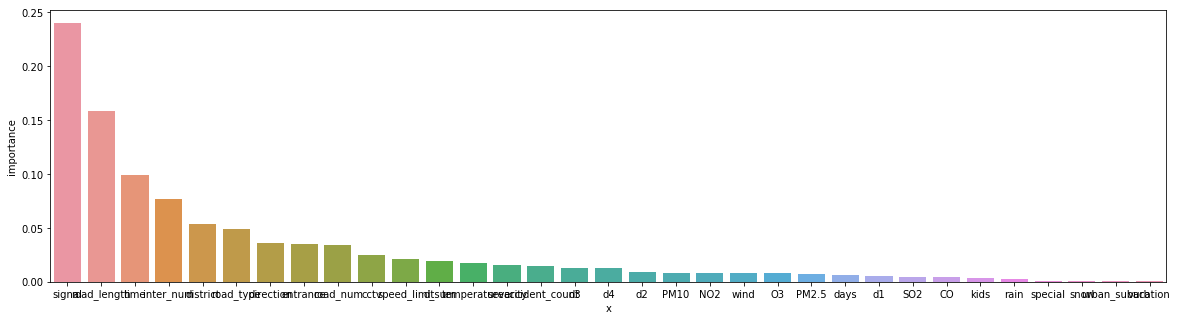

In [38]:
plt.figure(figsize=(20,5))

sns.barplot(d11['x'],d11['importance'])

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

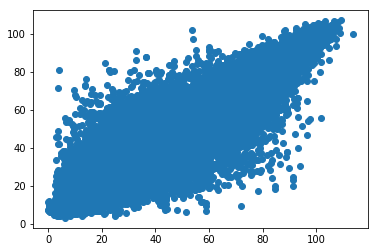

In [27]:
plt.scatter(y_test, rf_pred)

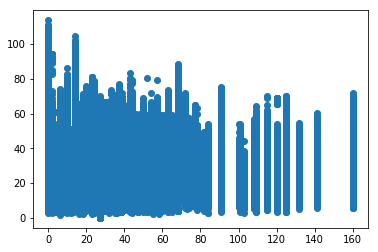

In [32]:
plt.scatter(morning_train['signal'],y_train)

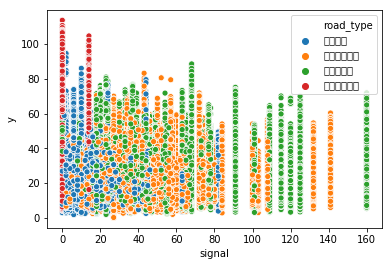

In [11]:
sns.scatterplot(x=X_train['signal'], y=y_train, hue=X_train['road_type'])
plt.show()

In [12]:
morning_train.head(3)

,date,days,road_name,link_id,start_point,end_point,direction,road_length,road_num,road_type,...,PM2.5,inter_num,d1,d2,d3,d4,d_sum,severity,accident_count,y
0,20180820,월,올림픽로92길,1240015600,현대백화점인재개발원,브라운스톤암사,하행,377,1.0,기타도로,...,19.0,1.0,0.0,2.0,0.0,0.0,2.0,6.0,2.0,25.14
1,20181121,수,가좌로,1110004700,응암오거리,충암고교,하행,682,2.0,보조간선도로,...,36.0,8.0,1.0,20.0,44.0,10.0,75.0,214.0,66.0,36.23
2,20181108,목,남부순환로,1140011300,과학수사연구소입구,신월지하차도,상행,464,5.0,주간선도로,...,5.0,45.0,4.0,215.0,799.0,81.0,1099.0,3171.0,749.0,27.41


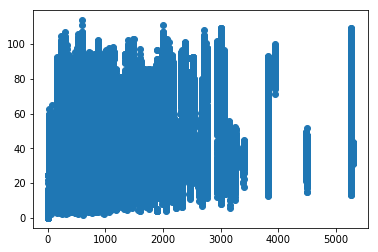

In [33]:
plt.scatter(morning_train['road_length'],y_train)

In [20]:
# RandomForest, GBM, XGBoost, LightGBM 모델별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg] :
    get_model_predict(model, X_train, X_test, y_train, y_test)

KeyboardInterrupt: 

In [27]:
X_train.head(2)

,days,direction,road_length,road_num,road_type,urban_suburb,district,special,vacation,time,...,PM10,PM2.5,inter_num,d1,d2,d3,d4,d_sum,severity,accident_count
0,3,1,377,1.0,0,1,1,0,0,1,...,27.0,19.0,1.0,0.0,2.0,0.0,0.0,2.0,6.0,2.0
1,2,1,682,2.0,2,1,21,0,0,0,...,42.0,36.0,8.0,1.0,20.0,44.0,10.0,75.0,214.0,66.0


In [39]:
# Partial Dependence Plots - adapted from Dan B NB on Kaggle()

from sklearn.preprocessing import Imputer
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

my_plots = plot_partial_dependence(rf,       
                                   features=[0, 1, 2], # column numbers of plots we want to show
                                   X=X_train,            # raw predictors data.
                                   feature_names=X_train.columns[:2], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis


ValueError: gbrt has to be an instance of BaseGradientBoosting